##  Optimze and a Dense Neural Network for gap filling and feature identification

** With a few tweaks to RepRunner, an LSTM can be run instead

In [1]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from multiprocessing import Pool
from functools import partial
from sklearn import metrics

## Personal Modules
import ReadStandardTimeFill as RSTF
import importlib
import DenseNet as Dense
import MiscFuncs as MF
importlib.reload(Dense)
importlib.reload(RSTF)
importlib.reload(MF)

# %matplotlib inline

%matplotlib notebook
%config IPCompleter.greedy=True

from scipy.optimize import minimize, curve_fit
from scipy.stats import norm
from matplotlib import cm

from scipy import stats

from ipywidgets import FloatProgress, HTML
from IPython.display import display, clear_output
import os  
import shutil
from keras import backend as K
try:pool.close()
except:pass

import json
import os

def RecWrite(AllRes,Path):
    for f in AllRes.keys():
        try:
            os.mkdir(Path)
        except:
            pass
        for t in AllRes[f].keys():
            if t != 'Results' and t != 'Records' and t!= 'Removed':
                for p in AllRes[f][t].keys():
                    if t == 'X':
                        np.save(Path+f+'_'+t+'_'+str(p)+'.npy',AllRes[f][t][p][0])
                        
                    else:
                        for p2 in AllRes[f][t][p].keys():
                            print(f,t,p,p2)
                            np.save(Path+f+'_'+t+'_'+str(p)+'_'+str(p2)+'.npy',AllRes[f][t][p][p2])
        AllRes[f]['Records'].to_csv(Path+f+'_Runs.csv')
        AllRes[f]['Results'].to_csv(Path+f+'_Results.csv')
        
def RecRead(Path,Vars=['fco2','fch4','ER']):
    AllRes={}
    for f in Vars:
        try:
            AllRes[f]={}
            AllRes[f]['Records']=pd.read_csv(Path+f+'_Runs.csv',index_col=0)
            AllRes[f]['Results']=pd.read_csv(Path+f+'_Results.csv',index_col=0)
            AllRes[f]['Derivatives']={}
            AllRes[f]['SSQ'] ={}
            AllRes[f]['X'] = {}
            AllRes[f]['Yhat'] = {}
            AllRes[f]['Ytrue'] = {}
            AllRes[f]['Outputs'] = {}
        except:
            pass
    return(AllRes)
# print())

def Test(params,X,y,YScaled,XScaled,pool):
    return(np.random.rand(params['K']))

def Stats(mse,rmse,se,r2,j,params,i=0):
    df = pd.DataFrame(index = [str(j)+'_'+str(i)],#params['N'])],
          data={'Model':[params['Model']],'Size':j,'Nodes':params['N']
                ,'MSE':[mse],'RMSE':[rmse],'SE':[se],'r2':[r2],
                'Performance':0,'K':[params['K']]})
    return(df)

def t(p,n):
    alpha = 1-p
    df = n-1
    return(stats.t.ppf(alpha,df))

def Display (tar,prog1=None,prog2=None,MdLs=None,MdL=None):
    clear_output()
    display(tar)
    if prog1!=None:
        display(prog1)
    if prog2!=None:
        display(prog2)
    if MdLs!=None:
        display(MdLs)
    if MdL!=None:
        display(MdL)
tar = HTML(
            value=" ",
            placeholder='Target: ',
            description='Target: ',
        )
kwt = HTML(
        value=str(0),
        placeholder='Quit Score: ',
        description='Quit Score: ',
        )

cwd = os.getcwd()
alpha = .05
pd.set_option('max_colwidth',200)

Path = 'C:\\Users\\wesle\\NetworkAnalysis\\FishIsland/'  
Site='FishIsland'




try:
    os.mkdir(Path+'/')
except:
    pass


Using TensorFlow backend.


# Check correlation between inputs

In [11]:
Full_Input = {'fco2':{
              'Net Radiation':'Radiation',
              'Wind Speed':'U',
              'u*_est':'U',
              'PPFD_AWS':'Radiation',
              'Ts_15':'Temp',
              'Ts_5':'Temp',
              'Ts_5_2':'Temp',
              'VPD_ecmwf_AWS':'VPD',
              'Daytime':'Daytime',
              'AL':'Seasonal'
                        },
              'fch4':{
              'Net Radiation':'Radiation',
              'Wind Speed':'U',
              'u*_est':'U',
              'Ts_15':'Temp',
              'Ts_15_2':'Temp',
              'VPD_ecmwf_AWS':'VPD',
              'WTD':'Water',
              'Daytime':'Daytime',
              'AL':'Seasonal'
              }
             }

Full_Input = {'fco2':{
              'Net Radiation':'Radiation',
              'Wind Speed':'U',
#               'u*_est':'U',
              'PPFD_AWS':'Radiation',
              'Ts_15':'Temp',
              'Ts_5':'Temp',
              'Ts_5_2':'Temp',
              'VPD_ecmwf_AWS':'VPD',
#               'Daytime':'Daytime',
              'AL':'Seasonal'
                        },
              'fch4':{
              'Net Radiation':'Radiation',
              'Wind Speed':'U',
#               'u*_est':'U',
#               'Ts_15':'Temp',
              'Ts_15':'Temp',
              'VPD_ecmwf_AWS':'VPD',
              'WTD':'Water',
#               'Daytime':'Daytime',
              'AL':'Seasonal'
              }
             }


MP = True
# MP = False
if MP == True:
    processes = 2
else:
    processes = 1
Scope = 'Full'
# Scope = 'Test'
# Scope = 'Smol'
Runs = 1
Threshold = 0.05    
params = Dense.Params(Path,Scope,None,MP=MP)

In [12]:
Time = time.time()
AllRes={}
if __name__ == '__main__':
    for target in ['fco2','fch4']:
        params['target']=target
        Thresh = Threshold*1
        try:
            shutil.rmtree(params['Dpath']+'/'+target+'/')
        except: pass
        try: 
            os.mkdir(params['Dpath']+'/'+target+'/')
        except: pass
        AllRes[target]={}
        AllRes[target]['Derivatives'] = {}
        AllRes[target]['SSQ'] ={}
        AllRes[target]['X'] = {}
        AllRes[target]['Yhat'] = {}
        AllRes[target]['Ytrue'] = {}
        AllRes[target]['Outputs'] = {}
        Rm = []
        Input = list(Full_Input[target].keys())
        start = len(Input)
        IpKey=np.arange(0,start)
        IpDict={'Factors':Input.copy(),'Key':IpKey}
        tar.value=target
        prog2 = FloatProgress(min=0, max=100,description='Bootstrapping:')
        MdL = HTML(value=" ",placeholder='Testing: ',description='Testing: ')
        Continue = True
        run = 1
        Kill = Runs
        while len(Input)>0 and run == 1:
            params = Dense.Params(Path,Scope,target,MP=MP)
            j = len(Input)
            AllRes[target]['Derivatives'][j] = {}
            AllRes[target]['SSQ'][j] ={}
            AllRes[target]['Yhat'][j] = {}
            AllRes[target]['Ytrue'][j] = {}
            AllRes[target]['Outputs'][j] = {}
            Time2 = time.time()
            params['Inputs'] = Input
            MdL.value='N = '+str(j)+':  '+str(params['Inputs'])
            Display (tar,prog2=prog2,MdL=MdL)
            print(run,Kill)
            print('Inputs!: ', params['Inputs'])
            print('Total Runtime: ',time.time()-Time)
            print('Training Time: ', time.time()-Time2)
            params['Model'] = '+'.join(params['Inputs'])
            RST = RSTF.ReadStandardTimeFill(params,'AWS_FI.csv')#,resample='3H')
            if target == 'ER':
                RST.Master = RST.Master.loc[RST.Master['co2_flux']>0]
            params['N'] = int(np.round(RST.Master[target].count()*(1-params['validation_split'])/30))
            print('N: ',params['N'])
            params['Sname'] = 'Y_'
            params['Spath'] = params['Dpath']+'/'+target+'/'+str(j)+'_'+str(params['N'])+'/'
            print(params['Dpath'],params['Spath'])
            try:
                os.mkdir(params['Spath'])
            except:
                pass
            print(params['target'],params['Inputs'])
            RST.Scale(params['target'],params['Inputs']) 
            y = RST.y*1.0
            X = RST.X*1.0
            params['Memory'] = (math.floor(100/params['proc'])- 5/params['proc']) * .01
            Y_hat=[]
            y_true=[]
            X_true=[]
            index=[]
            ones=[]
            prog2.value=0
            Avs = []
            Derivatives = []
            Outputs=[]
            if MP == False:
                for k in range(params['K']):
                    results = Dense.Bootstrap(k,params=params,X=X,y=y)
                    Y_hat.append(RST.YScaled.inverse_transform(results[0].reshape(-1,1)))
                    y_true.append(RST.YScaled.inverse_transform(results[1].reshape(-1,1)))
                    X_true.append(RST.XScaled.inverse_transform(results[2]))
                    ones.append(results[3])
                    prog2.value=(k+1)/params['K']*100
                    Avs.append(results[4])
                    Derivatives.append(results[5])
                    Outputs = results[6]
            else:
                pool = Pool(processes=processes,maxtasksperchild=75)
                for k,results in enumerate(pool.imap_unordered(partial(Dense.Bootstrap,params=params,X=X,y=y)
                                                               ,range(params['K']))):
                    Y_hat.append(RST.YScaled.inverse_transform(results[0]))
                    y_true.append(RST.YScaled.inverse_transform(results[1]))
                    X_true.append(RST.XScaled.inverse_transform(results[2]))
                    ones.append(results[3])
                    prog2.value=(k+1)/params['K']*100
                    Avs.append(results[4])
                    Derivatives.append(results[5])
                    Outputs.append(results[6])
                pool.close()
            Y_hat = np.squeeze(np.asanyarray(Y_hat))
            y_true = np.squeeze(np.asanyarray(y_true))
            X_true = np.asanyarray(X_true)
            ones = np.asanyarray(ones)
            params['Memory'] = .95
            results = Dense.Sort_outputs(0,params=params,Y_hat=Y_hat,y_true=y_true,X_true=X_true,ones=ones)
            mse,rmse,se,r2,Y_Val,Y_hat_Val = results
            Level = Stats(mse,rmse,se,r2,j,params,i=params['N'])
            Level.to_csv('Temp.csv')
            Level['Thresh'] = Level['MSE']+Level['SE']
            Level['Remove'] = 'N/A'
            Min = Level.loc[Level['MSE']==Level['MSE'].min()]
            if Kill == Runs:
                Records = Level
            else:
                Records = Records.append(Level)
            Av = np.array(Avs).mean(axis=0)
            Drv = np.array(Derivatives)
            Range = Drv.mean(axis=0).max(axis=1)-Drv.mean(axis=0).min(axis=1)
            SE = np.array(Avs).std(axis=0)**.5/(params['K']**.5)
            Key = str(j)+'_'+ str(params['N'])
            if Kill<Runs:
                IpDict['RC_Sum: '+Key]=np.zeros(Results.shape[0])
                IpDict['RC: '+Key]=np.zeros(Results.shape[0])
                IpDict['RG: '+Key]=np.zeros(Results.shape[0])
                IpDict['SE: '+Key]=np.zeros(Results.shape[0])
                IpDict['CS: '+Key]=np.zeros(Results.shape[0])
            Results = pd.DataFrame(data=IpDict)
            for I,A,S,R in zip(Input,Av,SE,Range):
                Results.loc[Results['Factors']==I,'RC: '+Key]=A
                Results.loc[Results['Factors']==I,'RG: '+Key]=R
                Results.loc[Results['Factors']==I,'SE: '+Key]=S
            Results['RC_Sum: '+Key]=Results['RC: '+Key]/Results['RC: '+Key].sum()
            IpDict['RC_Sum: '+Key]=Results['RC_Sum: '+Key].values
            IpDict['RC: '+Key]=Results['RC: '+Key].values
            IpDict['RG: '+Key]=Results['RG: '+Key].values
            IpDict['SE: '+Key]=Results['SE: '+Key].values
            Results = Results.sort_values('RC: '+Key)
            Resluts = Results.reset_index()
            Results['CS: '+Key]=Results['RC_Sum: '+Key].sort_values(ascending=False).cumsum().sort_values(ascending=False)
            Results = Results.sort_values('Key')
            IpDict['CS: '+Key]=Results['CS: '+Key].values
            Min = Records.loc[Records['MSE']==Records['MSE'].min()]
            ## Saving
            AllRes[target]['Records'] = Records
            AllRes[target]['Results'] = Results
            AllRes[target]['Derivatives'][j][params['N']] = Drv
            AllRes[target]['SSQ'][j][params['N']] = Avs
            AllRes[target]['X'][j] = X_true
            AllRes[target]['Outputs'][j][params['N']] = Outputs
            AllRes[target]['Yhat'][j][params['N']] = Y_hat_Val
            AllRes[target]['Ytrue'][j][params['N']] = Y_Val 
            Vee = 'RC_Sum: '+Key
            print(Vee)
            NewInput = Results.loc[Results[Vee]>Thresh,'Factors'].values
            print(run,Kill)
            if run <= 1 and Kill > 0:
                if len(NewInput) == len(Input):
                    print('ACAB',NewInput,Input)
                    run = 0
                elif len(NewInput)==0:
                    print('Bork',NewInput)
                    run = 0
                else:
                    print('Potat',NewInput)
                    Input = NewInput
                Kill -= 1
                
                print(run,Kill)
            else:
                run = 0

RecWrite(AllRes,Path)

HTML(value='fch4', description='Target: ', placeholder='Target: ')

FloatProgress(value=100.0, description='Bootstrapping:')

HTML(value="N = 4:  ['Net Radiation' 'Ts_15' 'WTD' 'AL']", description='Testing: ', placeholder='Testing: ')

1 0
Inputs!:  ['Net Radiation' 'Ts_15' 'WTD' 'AL']
Total Runtime:  140.29010033607483
Training Time:  0.01602649688720703
N:  24
C:\Users\wesle\NetworkAnalysis\FishIsland/ C:\Users\wesle\NetworkAnalysis\FishIsland//fch4/4_24/
fch4 ['Net Radiation' 'Ts_15' 'WTD' 'AL']


C:\Users\wesle\NetworkAnalysis\DenseNet.py:154: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
C:\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:709: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


RC_Sum: 4_24
1 0
fco2 Derivatives 8 40
fco2 Derivatives 3 40
fco2 SSQ 8 40
fco2 SSQ 3 40
fco2 Yhat 8 40
fco2 Yhat 3 40
fco2 Ytrue 8 40
fco2 Ytrue 3 40
fco2 Outputs 8 40
fco2 Outputs 3 40
fch4 Derivatives 6 24
fch4 Derivatives 4 24
fch4 SSQ 6 24
fch4 SSQ 4 24
fch4 Yhat 6 24
fch4 Yhat 4 24
fch4 Ytrue 6 24
fch4 Ytrue 4 24
fch4 Outputs 6 24
fch4 Outputs 4 24


Index(['8_40', '3_40'], dtype='object')
                     Model  Size  Nodes      MSE      RMSE        SE  \
3_40  PPFD_AWS+Ts_5+Ts_5_2     3     40  0.35091  0.592377  0.007602   

            r2  Performance   K    Thresh Remove  
3_40  0.840274            0  10  0.358513    N/A  
Group
Seasonal     0.000000
U            0.000000
VPD          0.000000
Temp         0.075527
Radiation    0.924473
Name: RC_Sum: 3_40, dtype: float64


<IPython.core.display.Javascript object>


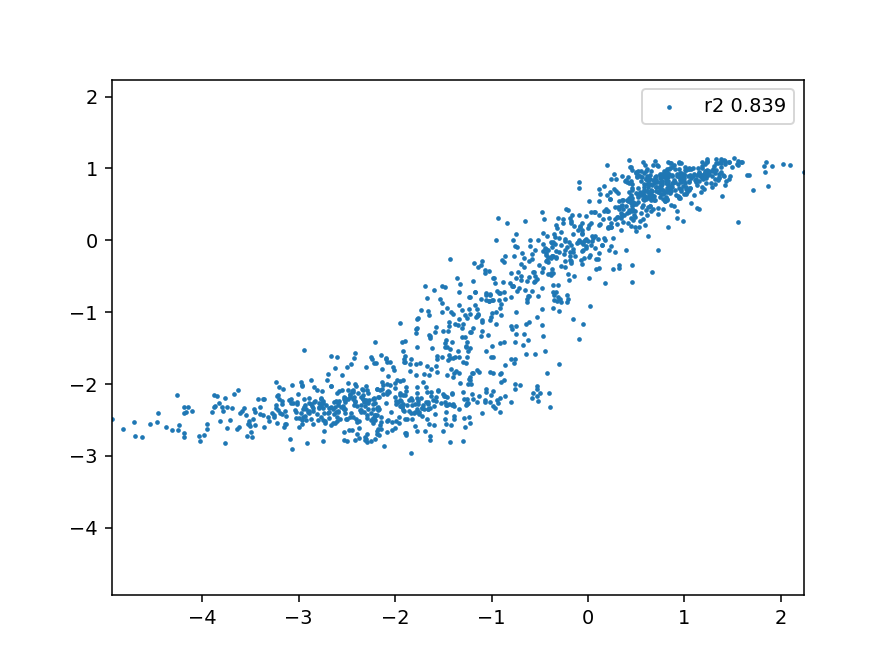

No handles with labels found to put in legend.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice


<IPython.core.display.Javascript object>


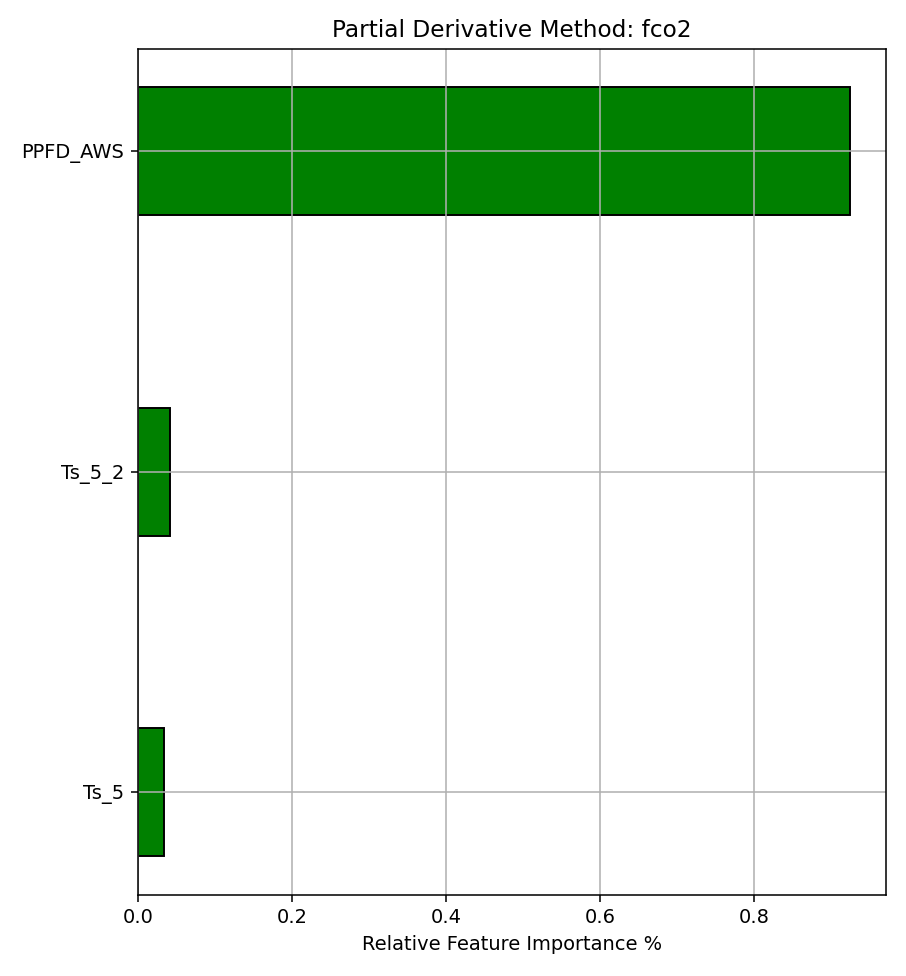

   index   Factors  Key  RC_Sum: 8_40     RC: 8_40  RG: 8_40   SE: 8_40  \
0      4      Ts_5    4      0.084458   430.114629  0.420586   3.032458   
1      5    Ts_5_2    5      0.087630   446.272267  0.734182   3.945343   
2      2  PPFD_AWS    2      0.721474  3674.220650  1.859271  11.218457   

   CS: 8_40  RC_Sum: 3_40     RC: 3_40  RG: 3_40  SE: 3_40  CS: 3_40  \
0  0.893562      0.033721   140.556412  0.717860  2.524830  1.000000   
1  0.809104      0.041806   174.256233  0.851693  2.214768  0.966279   
2  0.721474      0.924473  3853.417471  2.214966  5.547756  0.924473   

       Group  
0       Temp  
1       Temp  
2  Radiation  


In [16]:
Model_Index = None
F = 'fco2'
Model_Index = '3_40'
# F = 'fch4'
# Model_Index = '6_24'

Results = AllRes[F]['Results'].copy()
Records = AllRes[F]['Records'].copy()
if Model_Index == None:
    Best = Records.loc[Records['Size']==Records['Size'].min()]
else:
    Best = Records.loc[Records.index==Model_Index]    
print(Records.index)
print(Best)
Size = Best.Size.values[0]
Nodes = Best.Nodes.values[0]
Derivatives = np.load(Path+F+'_Derivatives_'+Best.index.values[0]+'.npy')
Mean = Derivatives.mean(axis=0)
X = np.load(Path+F+'_X_'+str(Size)+'.npy')
                 
Results['Group']=''
A=[]
for val in Results.Factors.values:
    try:Resluts.loc[Results['Factors']==val,'Group']=Classes[val]
    except:pass
    A.append(Full_Input[F][val])
Results['Group']=A
print(Results.groupby('Group').sum()['RC_Sum: '+Best.index.values[0]].sort_values())

RMSE=[]
plt.figure()
y = np.load(Path+F+'_Yhat_'+Best.index.values[0]+'.npy')
x = np.load(Path+F+'_Ytrue_'+Best.index.values[0]+'.npy')
for i in range(y.shape[0]):
    df = pd.DataFrame(data={'target':y[i],'y':x[i]}).dropna()
    rmse = metrics.mean_squared_error(df['y'],df['target'])**.5
    RMSE.append(rmse)
plt.legend()
slope,intercept,r,p,SE = stats.linregress(df['y'],df['target'])
df = pd.DataFrame(data={'target':np.nanmean(y,axis=0),'y':np.nanmean(x,axis=0)}).dropna()
plt.scatter(df['y'],df['target'],s=2,label='r2 '+str(np.round(r**2,3)))
plt.xlim(df['y'].min(),df['y'].max())
plt.ylim(df['y'].min(),df['y'].max())
plt.legend()


a = 'RC: '+Best.index.values[0]
ase = 'SE: '+Best.index.values[0]
try:
    Results = Results.loc[Results[a]>0].sort_values(a,ascending=True).reset_index()
except:
    pass
fig,ax=plt.subplots(figsize=(6.5,7))
ax.barh(Results.index,Results['RC_Sum: '+Best.index.values[0]],
         height=.4,color='g',edgecolor='k')
# ax2=ax.twiny()
# ax2.plot(Results['CS: '+Best.index.values[0]],Results.index,color='k')
ax.set_yticks(Results.index)
ax.set_yticklabels(Results['Factors'].values)
ax.set_xlabel('Relative Feature Importance %')
ax.set_title('Partial Derivative Method: '+F)
ax.grid()
# ax.set_xlim(0,1)
# ax2.set_xlim(0,1)
plt.tight_layout()
plt.savefig('PAD_'+F+'_PrunedFactors.png')
# print(Results[['Factors',a,'RG: 21_74']].sort_values(by=a,ascending=True))
# print(Results['RG: 21_74'].median())
# for i in range(4,8):
#     print(Results[['Factors','RC_Sum: '+str(i)+'_45']].sort_values(by='RC_Sum: '+str(i)+'_45'))
print(Results)
# print(Results['RC: '+Model_Index].mean()-Results['RC: '+Model_Index].std()/Results['RC: '+Model_Index].count()**.5)

          RMSE        r2
7_24  6.435945  0.731277


<IPython.core.display.Javascript object>


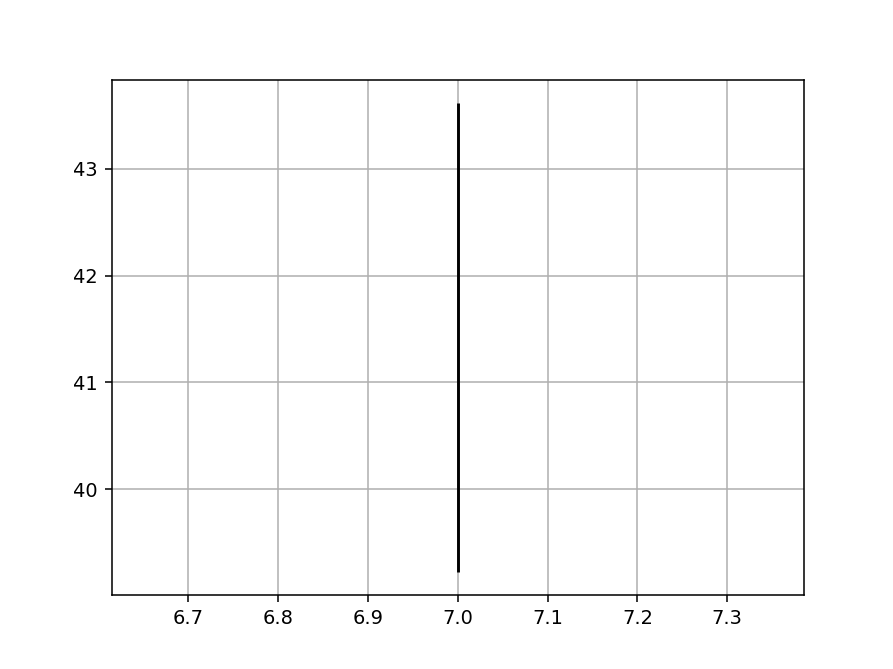

In [118]:
print(Records[['RMSE','r2']])
plt.figure()
plt.errorbar(Records['Size'],Records['MSE'],yerr=Records['SE'],ecolor='k')
plt.grid()

In [ ]:
int(np.round(RST.Master[target].count()/30)*((1-params['validation_split'])/30))

In [ ]:
print(np.round(RST.Master[target].count()*(1-params['validation_split'])/30))

In [38]:
print(RST.Master[['Deep','Shallow','Net LW Radiation ']].corr())

                       Deep   Shallow  Net LW Radiation 
Deep               1.000000  0.907183          -0.141262
Shallow            0.907183  1.000000          -0.367331
Net LW Radiation  -0.141262 -0.367331           1.000000
